In [18]:
#Load Packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
# Load Data Viz Pkgs
import seaborn as sns
import matplotlib.pyplot as plt
# Load Text Cleaning Pkgs
import neattext.functions as nfx
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup
import re,string,unicodedata

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay

In [19]:
# Load the dataset
df = pd.read_csv('data/emotion_dataset.csv')
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  34792 non-null  int64 
 1   Emotion     34792 non-null  object
 2   Text        34792 non-null  object
 3   Clean_Text  34326 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [21]:
df.describe() #descriptive statistics 

,Unnamed: 0
count,34792.000000
mean,17395.500000
std,10043.729619
min,0.000000
25%,8697.750000
50%,17395.500000
75%,26093.250000
max,34791.000000


In [22]:
null = df.isnull().sum() #check for missing values
print(f"Number of missing values in each column:\n{null}")
print(f"Total number of missing values: {null.sum()}") #total missing values

Number of missing values in each column:
Unnamed: 0      0
Emotion         0
Text            0
Clean_Text    466
dtype: int64
Total number of missing values: 466


In [23]:
duplicates = df.duplicated().sum() #check for duplicate rows
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [24]:
df["Emotion"].value_counts() #check the distribution of values in the 'label' column

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

C:\Users\anime\AppData\Local\Temp\ipykernel_19380\1886708862.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Emotion', data=df, palette='bright') #visualize the distribution of values in the 'label' column


Text(0.5, 1.0, 'Distribution of Emotions')

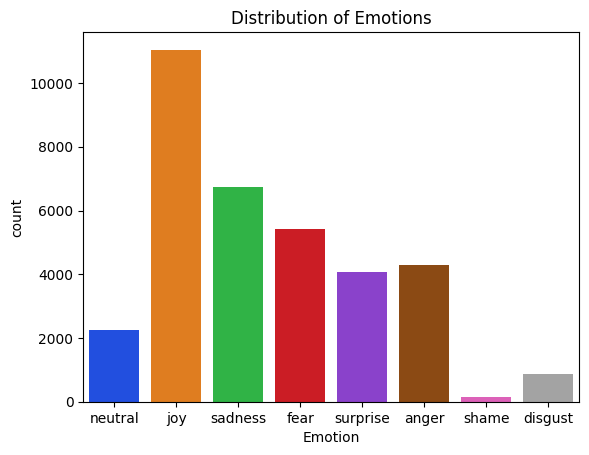

In [25]:
sns.countplot(x='Emotion', data=df, palette='bright') #visualize the distribution of values in the 'label' column
plt.title('Distribution of Emotions')

In [26]:
dir(nfx) #check the functions available in neattext

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [27]:
df['Clean_Text']=df.Text.apply(nfx.remove_userhandles)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_stopwords)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_hashtags)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_special_characters)
df['Clean_Text']=df.Clean_Text.apply(nfx.remove_emojis)
df['Clean_Text']=df.Clean_Text.apply(nfx.fix_contractions)

In [28]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,
1,1,joy,Sage Act upgrade on my to do list for tommorow.,sage act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,way homegirl baby funeral man hate funerals sh...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e b...


In [29]:
df.isnull().sum()

Unnamed: 0    0
Emotion       0
Text          0
Clean_Text    0
dtype: int64

In [31]:
df.dropna(inplace=True) #drop rows with missing values
df.drop([0], inplace=True) #drop the first row which is an empty row
df

,Unnamed: 0,Emotion,Text,Clean_Text
1,1,joy,Sage Act upgrade on my to do list for tommorow.,sage act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,way homegirl baby funeral man hate funerals sh...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e b...
5,5,fear,I'm expecting an extremely important phonecall...,im expecting extremely important phonecall min...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift hope like it hand wear itll warm lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world definitely cnt away
34789,34789,anger,A man robbed me today .,man robbed today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",youu jealousy you


In [32]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [44]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=12)

In [45]:
# Build Pipeline
from sklearn.pipeline import Pipeline
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

c:\Users\anime\OneDrive\Desktop\Sentiment-Analysis-App\sentiment_env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,steps,"[('cv', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [46]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.6250239509484575